In [106]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from IPython.display import display, Math
from scipy.special import gamma

In [107]:
class GIUH:
    def __init__(self, Qmax, tc, m_Rb, m_Ra, m_Rl, L, t, GIUH_step):
        #self.Q = Q
        self.Qmax = Qmax
        self.tc = tc
        self.m_Rb = m_Rb
        self.m_Ra = m_Rb
        self.m_Rl = m_Rl
        self.L = L
        self.t = t
        self.GIUH_step = GIUH_step
        self.comp_u = []
        self.GIUH_list = [] 
        self.max_list = []
        
    def GIUH_v(self):
        self.v = 0.44 * ((giuh.Ra / giuh.Rb ) ** 0.55) * ((giuh.L/1000)  ** (-0.38)) * (giuh.L/1000) / self.tc
        
    def GIUH_vars(self):
        self.a = 3.29 * ((self.Rb / self.Ra) ** 0.78) * (self.Rl ** 0.07)
        self.k = 0.7 * ((self.Ra / (self.Rb * self.Rl)) ** 0.48) * L / self.v
        return 
    
    def GIUH_Rs(self):
        self.Rb = 1 / (10 ** m_Rb)
        self.Ra = 10 ** m_Ra
        self.Rl = 10 ** m_Rl
        return 
    
    def GIUH_U(self):
        self.u = ((self.time / self.k) ** (self.a - 1)) * np.exp(-self.time / self.k) / (self.k * gamma(self.a))
        return 

    def GIUH_qp(self):
        self.qp = (1.31 / (self.L / 1000)) * (self.Rl ** 0.43) * self.v
        return 

    def GIUH_tp(self):
        self.tp = 0.44 * ((self.Ra / self.Rb ) ** 0.55) * ((self.L / 1000)  ** (-0.38)) * (self.L / 1000) / self.v
        return 
    
    def GIUH_loop(self):
        for i in range(len(t)):
            self.time = t[i]
            self.GIUH_U()
            self.comp_u.append(self.u)
            
    def GIUH_plot(self):
        figure(figsize=(20, 10), dpi=300)
        plt.plot(self.t, self.comp_u, linewidth=5.0)
        plt.xlabel("Time(s)", size = 30)
        plt.ylabel("GIUH", size = 30)
        plt.xticks(size = 20)
        plt.yticks(size = 20)
        plt.grid(True)
        plt.show()
        
    def altElement(self):
        for i in range(0, math.floor(len(self.comp_u)/self.GIUH_step)):
            ini = i * self.GIUH_step
            end = (i + 1) * self.GIUH_step
            list_extracted = self.comp_u[ini:end]
            self.max_list.append(np.mean(list_extracted))
        return self.max_list

   
    def GIUH_ordinates(self):
        #self.comp_u = [1, 4, 3, 9, 4, 1, 2]
        #self.GIUH_step = 2
        self.GIUH_list = self.altElement()
        print(self.GIUH_list)
        for i in range(len(self.GIUH_list)):
            self.GIUH_list[i] = self.GIUH_list[i] * self.GIUH_step
        #self.GIUH_list.pop(0)
        print("   Length of the GIUH ordinates: {:9.1f}".format(len(self.GIUH_list)))
        self.res = (1 - np.sum(self.GIUH_list)) / len(self.GIUH_list)
        for i in range(len(self.GIUH_list)):
            self.GIUH_list[i] = self.GIUH_list[i] + self.res 
        print("\n   Sum of the GIUH ordinates: {:9.10f}".format(np.sum(self.GIUH_list)))

In [141]:
# Q =
Qmax = 207 * 0.028316846592 # 6/17/2000 #63.41 * 0.028316846592      # m^3/s
tc =  60 / 60# 14 / 60 S3# 15 / 60 S4#       
m_Ra = 0.716 #0.716 S3#0.526 S4
m_Rb = -0.664 #-0.664 S3#-0.716 S4
m_Rl = 0.463 #0.463 S3#0.134 S4
L = 8141 #8141 S3 #833 S4                           # m
t = [i for i in range(3600*6)] # s4           # s
GIUH_step = 3600                            #s

giuh = GIUH(Qmax, tc, m_Rb, m_Ra, m_Rl, L, t, GIUH_step)
   # m/s

In [142]:
giuh.GIUH_Rs()
giuh.GIUH_v()
giuh.GIUH_vars()
giuh.GIUH_qp()
giuh.GIUH_tp()
giuh.GIUH_loop()

In [143]:
print("   Qmax of the GIUH: {:9.10f}".format(giuh.Qmax) + " m^3/s")
print("   Ra of the GIUH: {:9.10f}".format(giuh.Ra))
print("   Rb of the GIUH: {:8.4f}".format(giuh.Rb))
print("   Rl of the GIUH: {:9.10f}".format(giuh.Rl))
print("   v of the GIUH: {:8.4f}".format(giuh.v) + " m/s")
print("   L of the GIUH: {:8.4f}".format(giuh.L) + " m/s")
print("   k of the GIUH: {:9.10f}".format(giuh.k))
print("   a of the GIUH: {:8.4f}".format(giuh.a))
print("   peak discharge of the GIUH: {:9.10f}".format(giuh.qp))
print("   The time to peak of the GIUH: {:8.4f}".format(giuh.tp))

   Qmax of the GIUH: 5.8615872445 m^3/s
   Ra of the GIUH: 5.1999599653
   Rb of the GIUH:   4.6132
   Rl of the GIUH: 2.9040226545
   v of the GIUH:   1.7245 m/s
   L of the GIUH: 8141.0000 m/s
   k of the GIUH: 2098.0841859036
   a of the GIUH:   3.2288
   peak discharge of the GIUH: 0.4388907475
   The time to peak of the GIUH:   1.0000


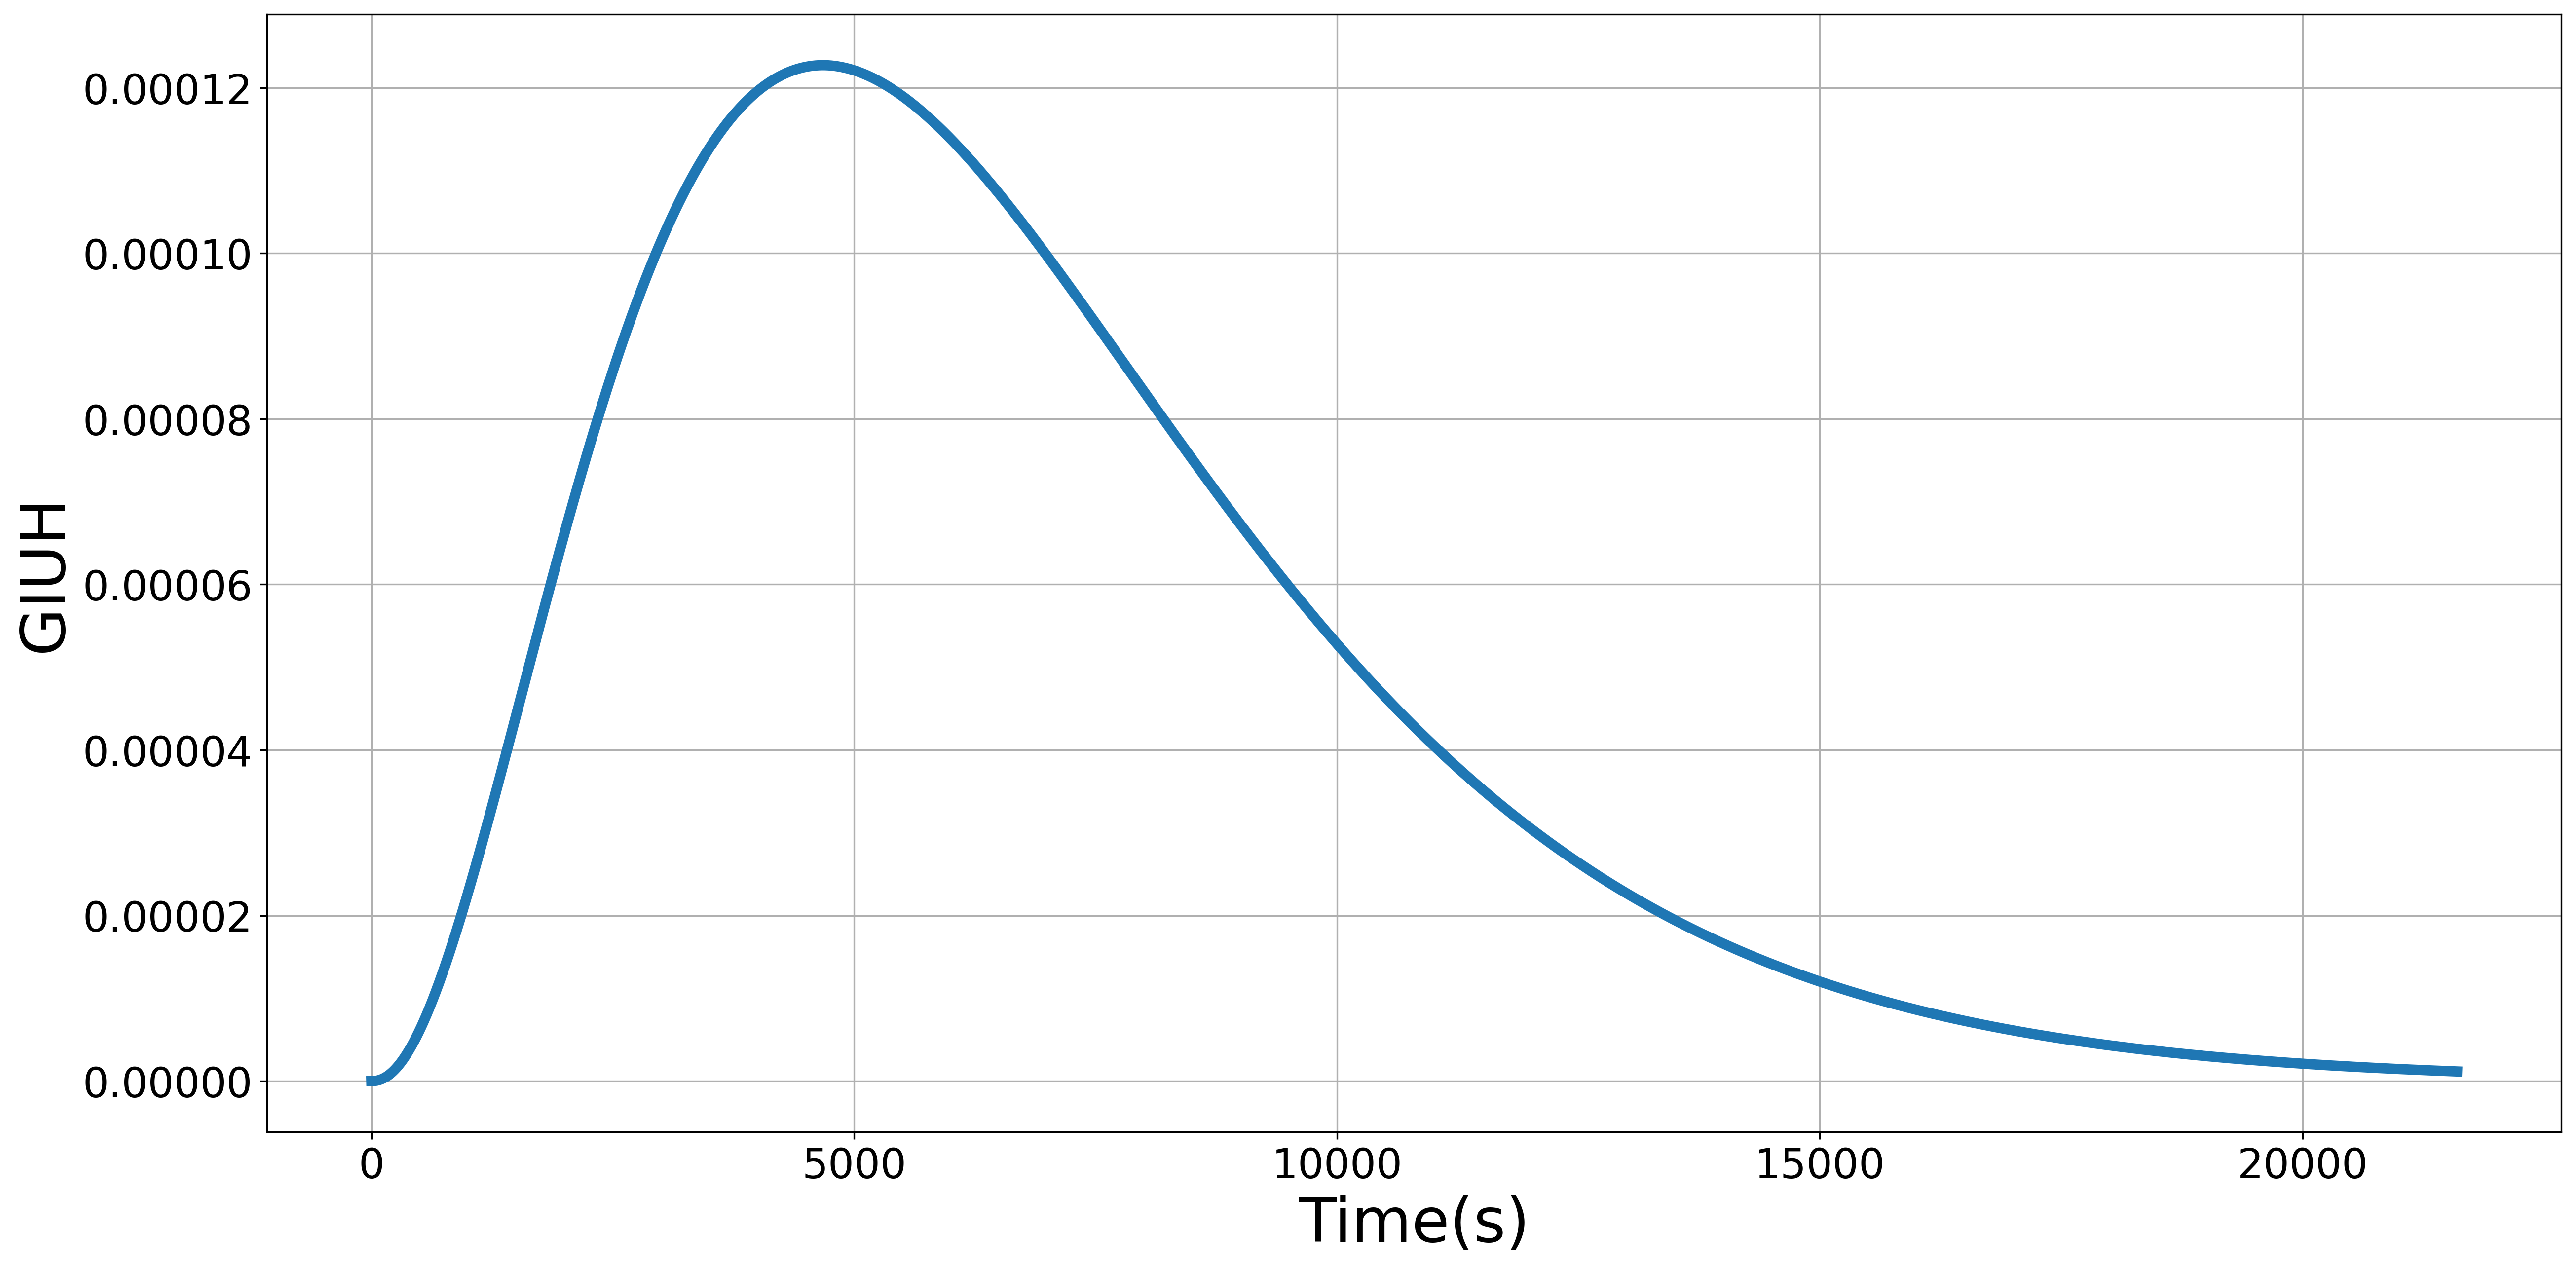

In [144]:
giuh.GIUH_plot()

In [145]:
giuh.GIUH_ordinates()

[5.6205627621844945e-05, 0.00011503892167631744, 6.809262443721713e-05, 2.6643359357412336e-05, 8.527549689867344e-06, 2.4244430731178167e-06]
   Length of the GIUH ordinates:       6.0

   Sum of the GIUH ordinates: 1.0000000000


In [146]:
giuh.GIUH_list

[0.20284741059184228,
 0.4146472691879432,
 0.2456405991271821,
 0.09642324483988486,
 0.031206330036722893,
 0.009235146216424595]

In [105]:
lis =  [1, 5, 3, 4, 9]
max_list = []
def altElement(a):
    for i in range(0, math.floor(len(lis)/a)):
        print('a')
        ini = 0 + i*a
        print(ini)
        end = (i+1)*a
        print(end)
        list_extracted = lis[ini:end]
        print(list_extracted)
        max_list.append(max(list_extracted))
        
    return max_list
                        
altElement(2)    
    

a
0
2
[1, 5]
a
2
4
[3, 4]


[5, 4]

In [33]:
import math

In [37]:
math.floor(len(lis)/2)

2